<a href="https://colab.research.google.com/github/kaiovalente/ds-spotify/blob/master/Kaio_Valente_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install spotipy

In [0]:
!pip install wordcloud -q

## Autenticação do app ao spotify usando a lib Spotipy


In [0]:
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import seaborn as sns
sp = spotipy.Spotify()

sns.set_style("whitegrid")
 
from spotipy.oauth2 import SpotifyClientCredentials 
 
cid ='<CLIENT_ID>' 
secret = '<SECRET_ID>' 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, 
client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 

playlists = sp.user_playlists('kaiovalente')
#playlists

## Obtendo as músicas de 3 playlists diferentes da minha conta do spotify

Esse endpoint retorna de 100 em 100 registros, por isso usei o atributo offset para obter os resultados paginados


In [0]:
playlist = sp.user_playlist_tracks('kaiovalente', '43Stl0yoIDQKAdED4mLK3y', offset=0) 
songs1 = playlist['items']

playlist = sp.user_playlist_tracks('kaiovalente', '43Stl0yoIDQKAdED4mLK3y', offset=100) 
songs2 = playlist['items']

songs = songs1+songs2

In [0]:
playlist = sp.user_playlist_tracks('kaiovalente', '02P1mjCBp8hnKCR1nFzvDA', offset=0) 
songs1 = playlist['items']

playlist = sp.user_playlist_tracks('kaiovalente', '02P1mjCBp8hnKCR1nFzvDA', offset=100) 
songs2 = playlist['items']

playlist = sp.user_playlist_tracks('kaiovalente', '02P1mjCBp8hnKCR1nFzvDA', offset=200) 
songs3 = playlist['items']

playlist = sp.user_playlist_tracks('kaiovalente', '02P1mjCBp8hnKCR1nFzvDA', offset=300) 
songs4 = playlist['items']

playlist = sp.user_playlist_tracks('kaiovalente', '02P1mjCBp8hnKCR1nFzvDA', offset=400) 
songs5 = playlist['items']

songs = songs1+songs2+songs3+songs4+songs5
 

In [0]:
playlist = sp.user_playlist_tracks('kaiovalente', '5p2fMacWGGYqglOBsBaKuS', offset=0) 
songs6 = playlist['items']

playlist = sp.user_playlist_tracks('kaiovalente', '5p2fMacWGGYqglOBsBaKuS', offset=100) 
songs7 = playlist['items']

songs = songs+songs6+songs7


In [8]:
playlist = sp.user_playlist_tracks('kaiovalente', '1lEAhzi8XxEDQUkVEvxljb', offset=0) 
songs8 = playlist['items']

playlist = sp.user_playlist_tracks('kaiovalente', '1lEAhzi8XxEDQUkVEvxljb', offset=100) 
songs9 = playlist['items']

songs = songs+songs8+songs9
songs

df = pd.DataFrame(songs)
df

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2015-05-05T16:50:59Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'compilation', 'artis...",{'url': None}
1,2015-05-04T16:54:06Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
2,2015-05-05T16:51:09Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
3,2015-05-05T16:51:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
4,2015-05-05T19:39:18Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
...,...,...,...,...,...,...
745,2019-01-11T16:21:47Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
746,2019-01-11T16:21:56Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
747,2019-01-11T16:24:04Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
748,2019-01-11T16:26:57Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}


## Obtendo dados de artistas, albuns e músicas do spotify

Montamos 2 Dataframes, o primeiro com infomações sobre a música e seus respectivos artista e álbum.

No segundo, obtemos informações específicas do artista, para obter seus gêneros músicais e a popularidade no spotify

Ao todo são 750 músicas de 303 artistas dentro das 3 playlists selecionadas

In [9]:
musics_info = []
artists = []
for i, item in enumerate(songs):
    track = item['track']
    added_at = item['added_at']
    try:
      artist = sp.artist(track['artists'][0]['id'])
    except AttributeError:
       print('Erro ao obter dados do artista')
    musics_info.append((track['artists'][0]['name'], track['name'], track['album']['name'], added_at, track['id']))
    artists.append((track['artists'][0]['name'], track['artists'][0]['id'], artist['genres'], artist['popularity'] ))

#print(artists)

pd.set_option('display.max_rows', 50)
musics = pd.DataFrame(musics_info, columns=('Artists', 'Name', 'Album', 'Added_At', 'Id'))
musics


Erro ao obter dados do artista
retrying ...3secs
retrying ...4secs
retrying ...2secs
Erro ao obter dados do artista
Erro ao obter dados do artista
retrying ...4secs
retrying ...1secs


,Artists,Name,Album,Added_At,Id
0,Oasis,Don't Look Back in Anger,Stop The Clocks,2015-05-05T16:50:59Z,3XbefxYuXwdevdt9OegZhI
1,My Morning Jacket,Rocket Man,Ch. 1 The Sandworm Cometh: Early Recordings,2015-05-04T16:54:06Z,03auri1kCcQxFDvU3yoD3E
2,My Morning Jacket,Run Thru,Okonokos,2015-05-05T16:51:09Z,2GGGrPcQq2ZSo0jtq7mtLd
3,My Morning Jacket,Dondante,Okonokos,2015-05-05T16:51:13Z,6JYWIzoCSeO7c0r8FS9SBC
4,Led Zeppelin,Stairway to Heaven - 1990 Remaster,Led Zeppelin IV,2015-05-05T19:39:18Z,51pQ7vY7WXzxskwloaeqyj
...,...,...,...,...,...
745,Matumbi,Originary Man,Black Civilazation,2019-01-11T16:21:47Z,2l3NISzaUkF80bMLxllqnk
746,Edson Gomes,Árvore. - Ao Vivo,Ao Vivo Em Salvador,2019-01-11T16:21:56Z,5MIrspiQcYqNVB5XARdf5l
747,Bob Marley & The Wailers,So Much Trouble In The World,Survival,2019-01-11T16:24:04Z,209SbubR5uKaVzj5SeN42w
748,Bob Marley & The Wailers,Sun Is Shining,Kaya,2019-01-11T16:26:57Z,2pZJhvpin385eqAFRp3ASJ


In [10]:
df_artists = pd.DataFrame(artists, columns=('Name', 'Id', 'Genres', 'Popularity'))
df_artists

,Name,Id,Genres,Popularity
0,Oasis,2DaxqgrOhkeH0fpeiQq2f4,"[britpop, madchester, modern rock, permanent w...",82
1,My Morning Jacket,43O3c6wewpzPKwVaGEEtBM,"[alternative rock, chamber pop, garage rock, i...",61
2,My Morning Jacket,43O3c6wewpzPKwVaGEEtBM,"[alternative rock, chamber pop, garage rock, i...",61
3,My Morning Jacket,43O3c6wewpzPKwVaGEEtBM,"[alternative rock, chamber pop, garage rock, i...",61
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,"[album rock, classic rock, hard rock, rock]",83
...,...,...,...,...
745,Matumbi,3xcTmippYm0otGKkaIFZ0p,[uk reggae],27
746,Edson Gomes,4kFDUmta3ihdpLBVLh1Vhw,"[axe, brazilian reggae]",53
747,Bob Marley & The Wailers,2QsynagSdAqZj3U9HgDzjD,[reggae],84
748,Bob Marley & The Wailers,2QsynagSdAqZj3U9HgDzjD,[reggae],84


In [11]:
len(df_artists['Name'].unique().tolist())

303

Montando Dataframe de gêneros musicais dentre as bandas das playlists


In [12]:
genres = []
for index, row in df_artists.iterrows():
    for i, item in enumerate(row['Genres']):
      genres.append(item)

genres_df = pd.DataFrame(genres, columns =['Count'])
genres_df

,Count
0,britpop
1,madchester
2,modern rock
3,permanent wave
4,rock
...,...
4117,reggae
4118,african reggae
4119,french reggae
4120,reggae


In [13]:
genres_df['Count'].value_counts()

rock                        464
hard rock                   182
alternative rock            180
album rock                  178
post-grunge                 169
                           ... 
yacht rock                    1
spanish psychedelic rock      1
azonto                        1
neo-kraut                     1
brazilian rock                1
Name: Count, Length: 266, dtype: int64

In [14]:
musics['Artists'].value_counts().head(20)

Pink Floyd                  23
Bob Marley & The Wailers    22
Audioslave                  19
Red Hot Chili Peppers       17
Metallica                   17
Pearl Jam                   15
Led Zeppelin                14
Neil Young                   9
Alice In Chains              9
Black Label Society          9
Iron Maiden                  9
Megadeth                     8
Stone Temple Pilots          8
The Beatles                  8
Black Sabbath                8
Mad Season                   7
Zakk Wylde                   7
DOWN                         7
Helloween                    7
David Gilmour                7
Name: Artists, dtype: int64

In [15]:
musics['Album'].value_counts().head(20)

Audioslave                                                 9
Out of Exile                                               7
Legend (The Definitive Remasters)                          6
S&M                                                        5
Grimmest Hits                                              5
Stadium Arcadium                                           5
Cure For Pain                                              5
Reggae a Vida Com Amor                                     4
The Best, The Rest, The Rare (The Collection 1984-1988)    4
Unblackened (Live)                                         4
Missão de Paz                                              4
Hebron Gate                                                4
The Beatles (Remastered)                                   4
Above (Deluxe Edition)                                     4
Hisingen Blues                                             4
Nola                                                       4
The Division Bell       

## 100 Bandas mais presentes

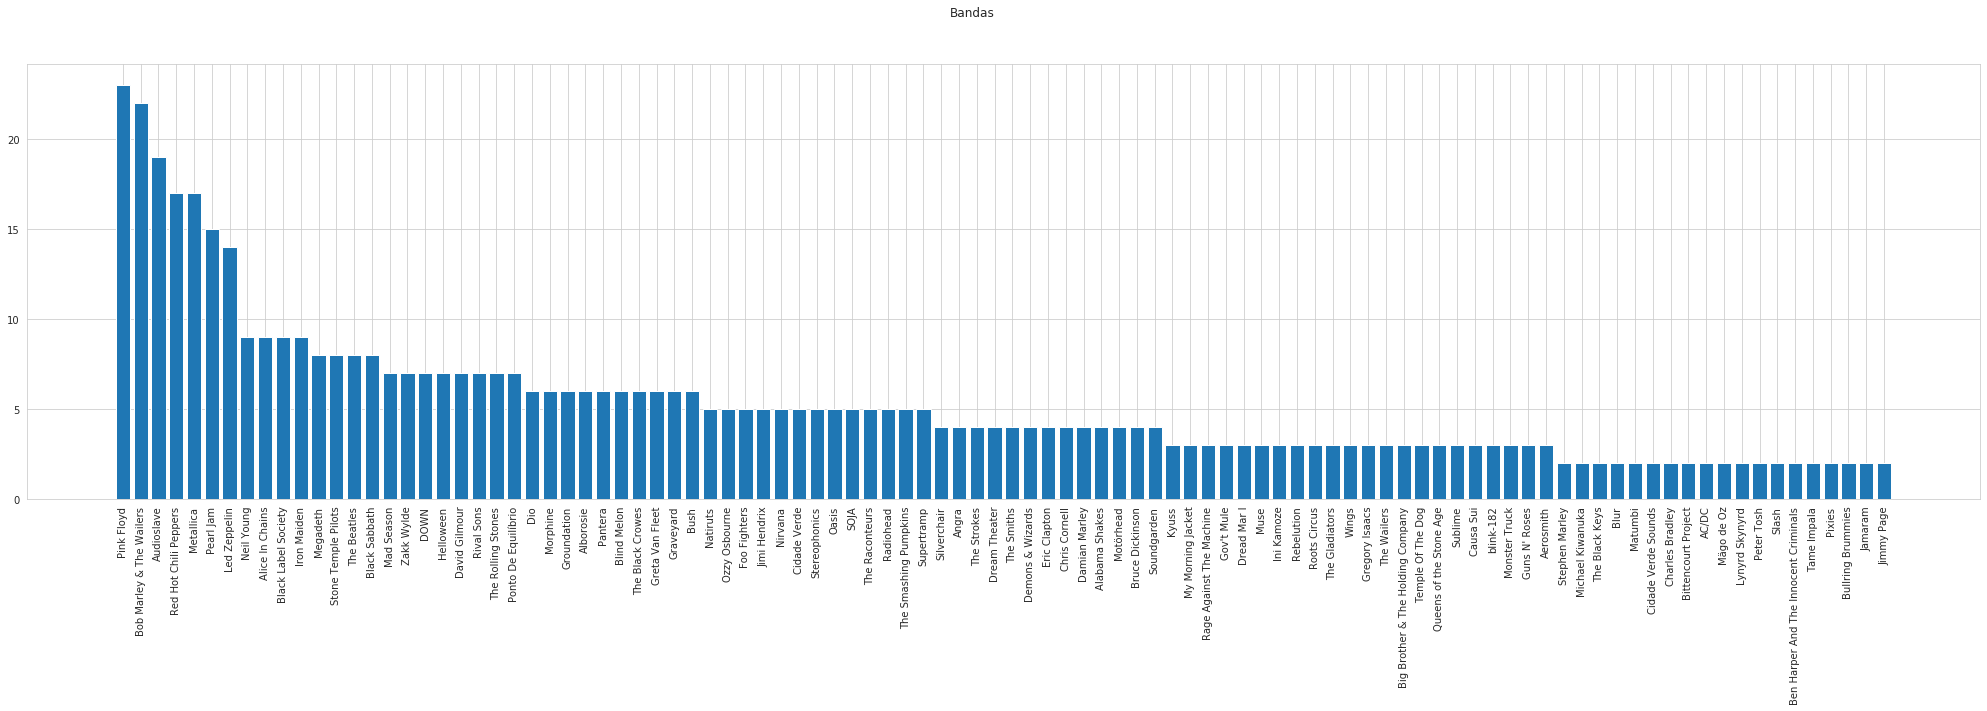

In [16]:
names = list(musics['Artists'].value_counts().keys())[:100]
values = list(musics['Artists'].value_counts())[:100]

fig, axs = plt.subplots(figsize=(35,8))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Bandas');

## 10 Bandas mais presentes

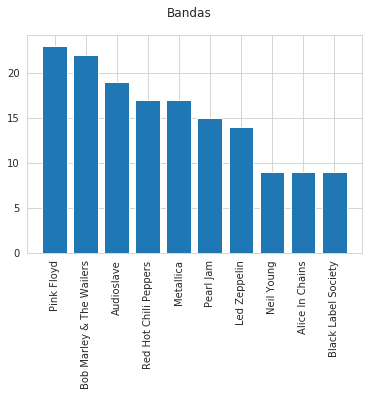

In [17]:
names = list(musics['Artists'].value_counts().head(10).keys())
values = list(musics['Artists'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Bandas');

## 10 Albums mais presentes

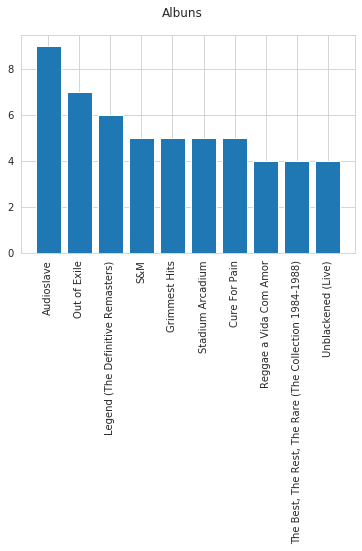

In [18]:
names = list(musics['Album'].value_counts().head(10).keys())
values = list(musics['Album'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Albuns');

## 100 Estilos mais presentes

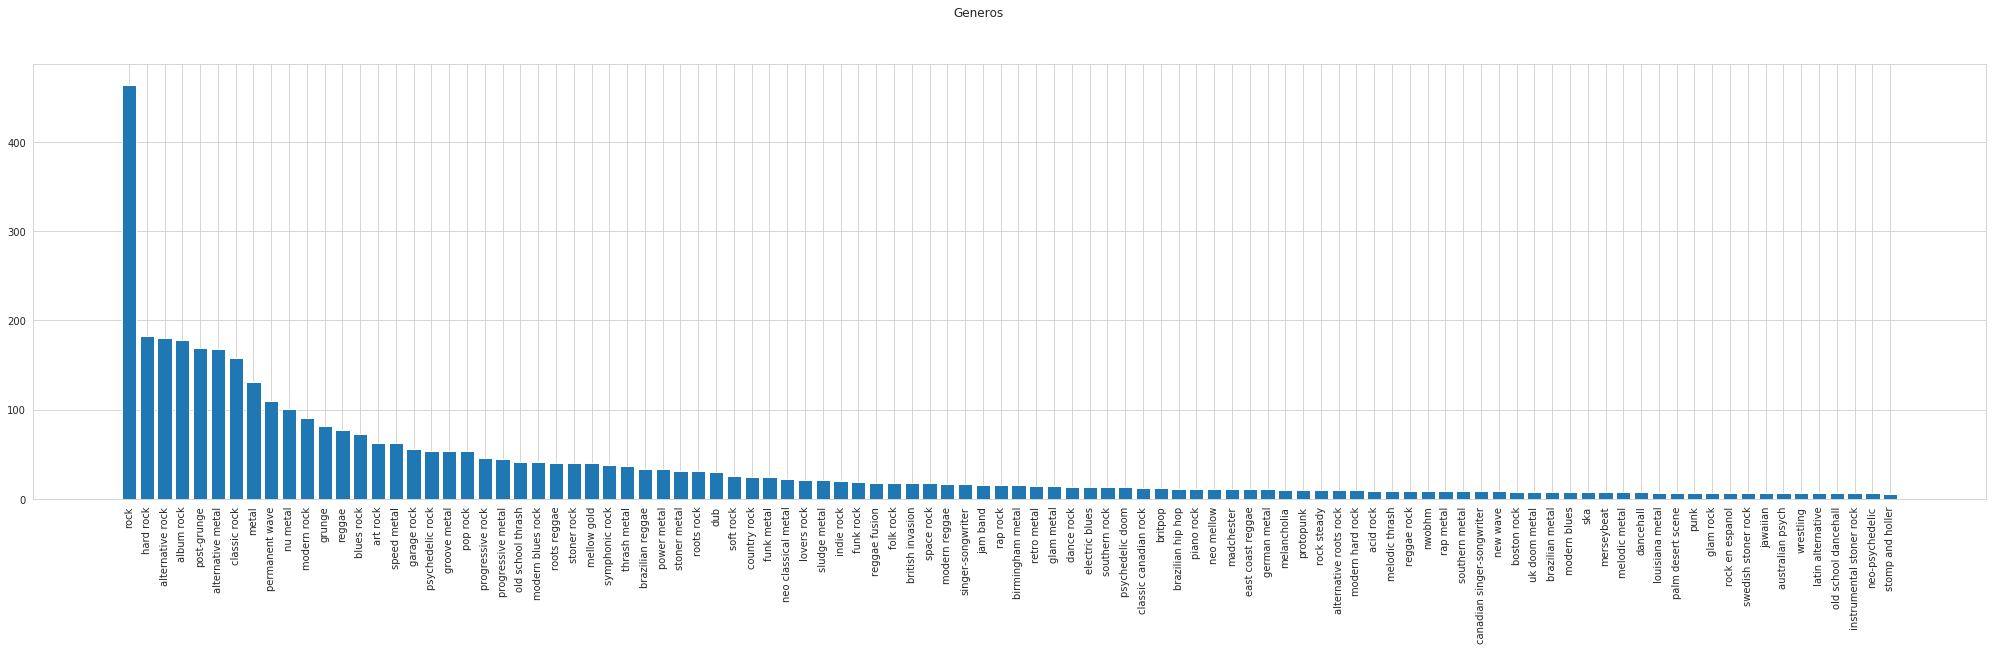

In [19]:
names = list(genres_df['Count'].value_counts().keys())[:100]
values = list(genres_df['Count'].value_counts())[:100]

fig, axs = plt.subplots(figsize=(35,8))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Generos');

## 20 Estilos mais presentes 


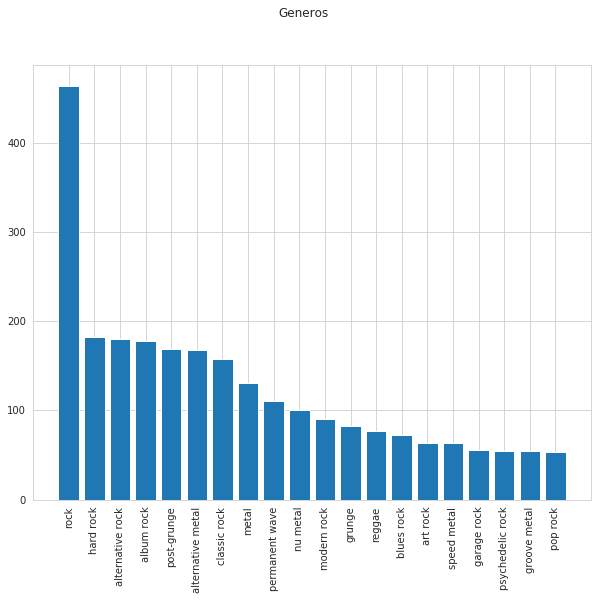

In [20]:
names = list(genres_df['Count'].value_counts().head(20).keys())
values = list(genres_df['Count'].value_counts().head(20))

fig, axs = plt.subplots(figsize=(10,8))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Generos');

## Bandas mais populares no Spotify

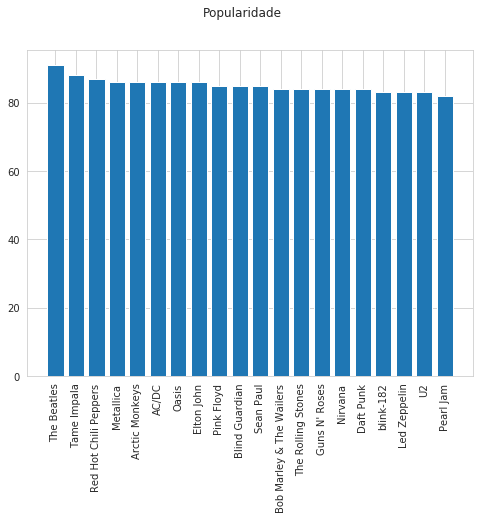

In [21]:
df_artists = df_artists.sort_values(by=['Popularity'], ascending=False)

names = df_artists['Name'].head(132)
values =  df_artists['Popularity'].head(132)

fig, axs = plt.subplots(figsize=(8,6))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Popularidade');

## Wordcloud montada com as bandas mais presentes nas playlists selecionadas

In [22]:
all_summary = " ".join(s for s in musics['Artists'])

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 9818


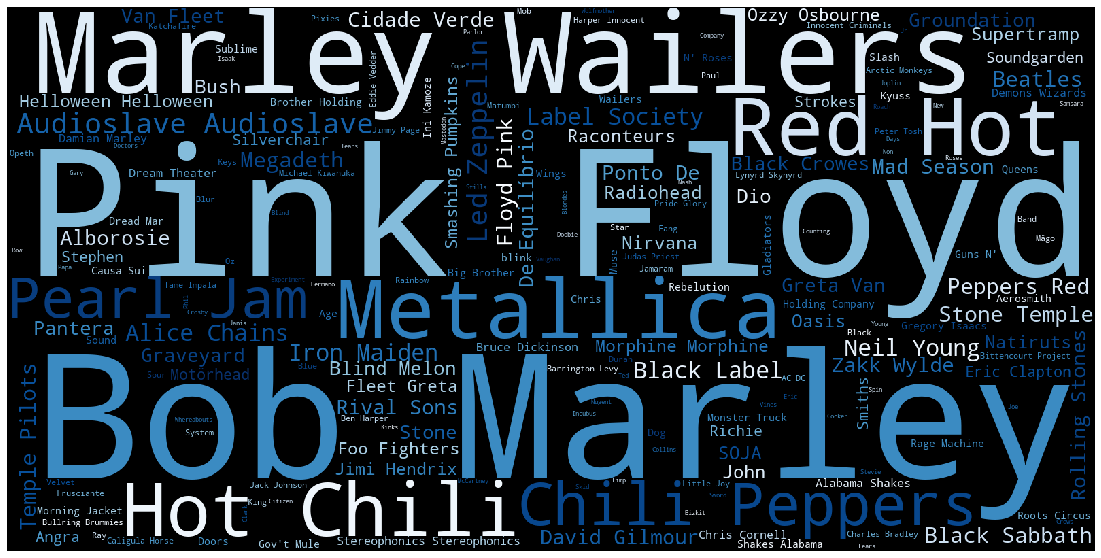

In [23]:
# gerar uma wordcloud
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800, colormap="Blues").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("bandas_spotify_kaiovalente.png");